In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

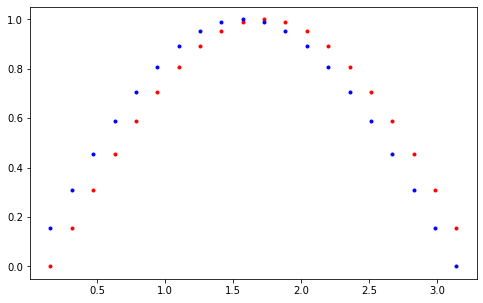

In [2]:
plt.figure(figsize=(8,5))

seq_length = 20

time_steps = np.linspace(0, np.pi, seq_length + 1)

data = np.sin(time_steps)

data.resize((seq_length + 1, 1))

x = data[:-1]
y = data[1:]

plt.plot(time_steps[1:], x, 'r.', label="input, x")
plt.plot(time_steps[1:], y, 'b.', label="input, y")

In [3]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim = hidden_dim
        
        #define an RNN with specified parameters
        #batch_first means the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        #last, fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        #hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)
        
        # get final output
        output = self.fc(r_out)
        
        return output, hidden

In [4]:
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print(f'Input size: {test_input.size()}')

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print(f'Output size: {test_out.size()}')
print(f'Hidden state size: {test_h.size()}')

Input size: torch.Size([1, 20, 1])
Output size: torch.Size([20, 1])
Hidden state size: torch.Size([2, 1, 10])
